# RETENCION CLIENTES EMPRESA DE TELEFONIA

# Abstract: 

La fuga de clientes, es comunmente conocida como "churn",en una Empresa de Telecomunicaciones.Es un desafío crítico que enfrentan las empresas de telecomunicaciones en la actualidad. 
La pérdida de clientes puede tener un impacto significativo en los ingresos y la rentabilidad de una empresa, 
por lo que entender los factores que contribuyen a la fuga de clientes es esencial para su supervivencia en un ambiente de suma competenciacomo es el de las telecomunicaciones.
 
# Contexto Comercial

El objetivo general es proporcionar una solución completa de inteligencia de clientes, 
que ayude a una empresa a anticipar y reducir la pérdida de clientes, conocer la siguiente 
mejor oferta y mejorar la experiencia para el cliente a través de múltiples canales. 

# Problema Comercial

El objetivo principal de este análisis es proporcionar insights valiosos que ayuden a la empresa a retener a sus
clientes y reducir la tasa de Renuncia.
Intentaremos  responder a algunas preguntas :
¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones?
¿Cuál es la distribución de la edad de los clientes?
¿Cómo se distribuyen los servicios contratados entre los clientes?
¿Cuál es la distribución de los cargos mensuales y totales de los clientes?
¿Qué porcentaje de clientes se encuentra satisfecho según las revisiones o encuestas?
¿Existe una relación entre la duración del contrato y la tasa de renuncia?
¿Cómo se relaciona la edad con la probabilidad de renuncia?
¿Los cargos mensuales varían según el tipo de servicio contratado?
¿Las revisiones de satisfacción están relacionadas con los servicios contratados?
¿Cómo interactúan la duración del contrato, los cargos mensuales y la satisfacción del cliente para influir en la renuncia?
¿Existen segmentos de clientes específicos con patrones de renuncia particulares basados en múltiples variables?
¿Cuál es la combinación óptima de servicios contratados que se asocia con la menor tasa de renuncia?

#  Hipótesis General:

"La tasa de renuncia de clientes en la empresa de telecomunicaciones está influenciada por una combinación de factores demográficos, patrones de consumo de servicios y niveles de satisfacción del cliente. A través del análisis de datos, buscamos identificar las variables clave que tienen un impacto significativo en la tasa de renuncia y proporcionar recomendaciones para reducir la renuncia de clientes y mejorar la retención."

# Contexto Analítico :


Contenido del Archivo de datos: Contiene 7043 filas (clientes) y 21 columnas (características). La columna "Churn" es nuestro variable target. Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre: Clientes que se fueron en el último mes. Columna Churn (Renuncia) Servicios a los que se ha suscrito cada cliente: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales. Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes Fuente

ATRIBUTOS:

customerID: Customer ID

gender : Si el cliente es hombre o mujer.

SeniorCitizen : Si el cliente es persona mayor o no (1, 0)

Partner: Si el cliente tiene pareja o no (Sí, No)

Dependents: Si el cliente tiene dependientes o no (Sí, No)

Tenure : (Tenencia) Número de meses que el cliente ha permanecido en la empresa.

PhoneService :Si el cliente tiene servicio telefónico o no (Sí, No)

MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)

InternetService : Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)

OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, No servicio de internet)

OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, No hay servicio de Internet)

DeviceProtection: Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, No servicio de internet)

StreamingTV: Si el cliente tiene streaming de TV o no (Sí, No, No servicio de internet)

StreamingMovies: Si el cliente tiene streaming de películas o no (Sí, No, No servicio de internet)

Contract: El plazo del contrato del cliente (mes a mes, un año, dos años)

PaperlessBilling: Si el cliente dispone de facturación electrónica o no (Sí, No)

PaymentMethod: El método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

MonthlyCharges:El importe cobrado a la cliente mensualmente.

TotalCharges: El importe total cargado a la cliente.

Churn: Si la cliente Canceló su suscripción o no (Sí o No)
Comenzaremos a responder las preguntas realizadas anteriormente:


In [3]:
#Importamos  Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/ProyectoCoderHouse/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df=  pd.read_csv(url,sep=",")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Variable Target: Churn
La variable objetivo es de tipo **Categorica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión Logística**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

# Feature selection: Filter Feature Selection 
## Correlación con el Target
Se calcula el coeficiente de correlación de los Features con el target y se ordena de mayor a menor valor absoluto. 
        <br>
**Aclaración:** Sólo sirve para features **numéricas**, así que en caso de ser categóricas combiene realizar alguna transformación. 

## ¿Cómo transformo categorías a números? 
Algunos métodos: 
1. **One-Hot (One-Hot Encoding):** Crea una columna binaria para cada categoría en la variable original. 
<br>
Tener cuidado cuando la variable tiene demasiadas categorías posibles porque se pueden generar muchas features. 
2. **Target Encoding:** A cada categoría se asigna une mátrica que tiene relación con el target (ejemplo, promedio, mediana). <br>Tener cuidado si hay categorías con muy pocos registros ya que las métricas pueden ser no representativas. 

In [5]:
# Verificamos que Tipos de Datos son:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
#La columna de Senior Citizen, la transformamos en SI o NO
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [8]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## Identifiquemos qué variables categóricas tenemos que trabajar. 

# One-Hot Encoding
Generaremos variables binarias para las categorías de las variables categóricas con 5 valores distintos o menos.

In [12]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [13]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

customerID          7043
PaymentMethod          4
OnlineSecurity         3
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
DeviceProtection       3
OnlineBackup           3
InternetService        3
MultipleLines          3
gender                 2
PhoneService           2
Dependents             2
Partner                2
PaperlessBilling       2
SeniorCitizen          2
Churn                  2
dtype: int64


In [14]:
# Primero las selecciono
col_aTransformar = valores_distintos.index[valores_distintos<=5]
col_aTransformar

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [16]:
# Patra transformarlas, vamos a usar el método get_dummies de pandas: 
df_dummies = pd.get_dummies(df[col_aTransformar],drop_first=True)
df_dummies.head()

,gender_Male,SeniorCitizen_Si,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [17]:
print(df.shape,df_dummies.shape)

(7043, 21) (7043, 28)


In [18]:
# Junto los resultados 
df = pd.concat([df, df_dummies], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,False,False,False,False,False,True,False,True,False,True


# Target Encoding 
Las variables con más de 5 valores posibles les haremos un tratamiento de Target Encoding, pero de manera más personalizada, para asegurarnos que haya cantidad suficiente de registros para calcular promedios o medianas. 

In [9]:
#Busco valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
#La columna de Senior Citizen, la transformamos en SI o NO
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [13]:
# Verificamos la columna Modificada
print(df['SeniorCitizen'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7038    NaN
7039    NaN
7040    NaN
7041    NaN
7042    NaN
Name: SeniorCitizen, Length: 7043, dtype: object


In [14]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     0 non-null      object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
#Busco valores nulos
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen       7043
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [18]:
# Llenar los valores faltantes en TotalCharges con MonthlyCharges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [19]:
#Chequeo nuevamente si existen valores nulos
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen       7043
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [20]:
# ¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones (ESTA SERA NUESTRA VARIABLE TARGET)?
clientes_renunciados = df[df['Churn'] == "Yes"].shape[0]
total_clientes = df.shape[0]
print(f"Cantidad de Clientes Activos en el mes {total_clientes}")
print(f"Cantidad de clientes que renunciaron: {clientes_renunciados}")
tasa_renuncia = (clientes_renunciados / total_clientes) * 100
print(f"Tasa de renuncia del mes {round(tasa_renuncia,1)} % ")

Cantidad de Clientes Activos en el mes 7043
Cantidad de clientes que renunciaron: 1869
Tasa de renuncia del mes 26.5 % 


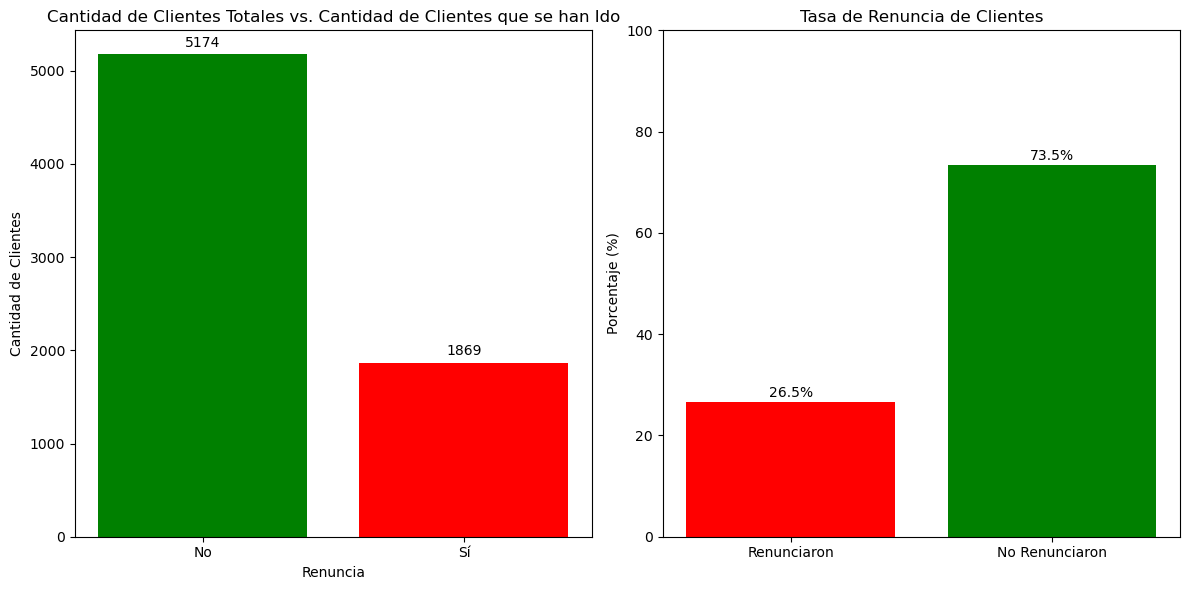

In [21]:
# Empezamos a visualizar la información de nuestro interés.
# Creamos  el primer gráfico de barras (Clientes Totales vs. Churn (RENUNCIAS))
plt.figure(figsize=(12, 6))

# Subplot 1: Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido
plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
bars = plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xlabel('Renuncia')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(churn_counts.index, ['No', 'Sí'])

# Subplot 2: Tasa de Renuncia de Clientes
plt.subplot(1, 2, 2)
tasa_renuncia = (clientes_renunciados / total_clientes)*100

etiquetas = ['Renunciaron', 'No Renunciaron']
porcentajes = [tasa_renuncia, 100 - tasa_renuncia]
colores = ['red', 'GREEN']

plt.bar(etiquetas, porcentajes, color=colores)
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 1, f'{porcentaje:.1f}%', ha='center')

plt.title('Tasa de Renuncia de Clientes')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

ValueError: min() arg is an empty sequence

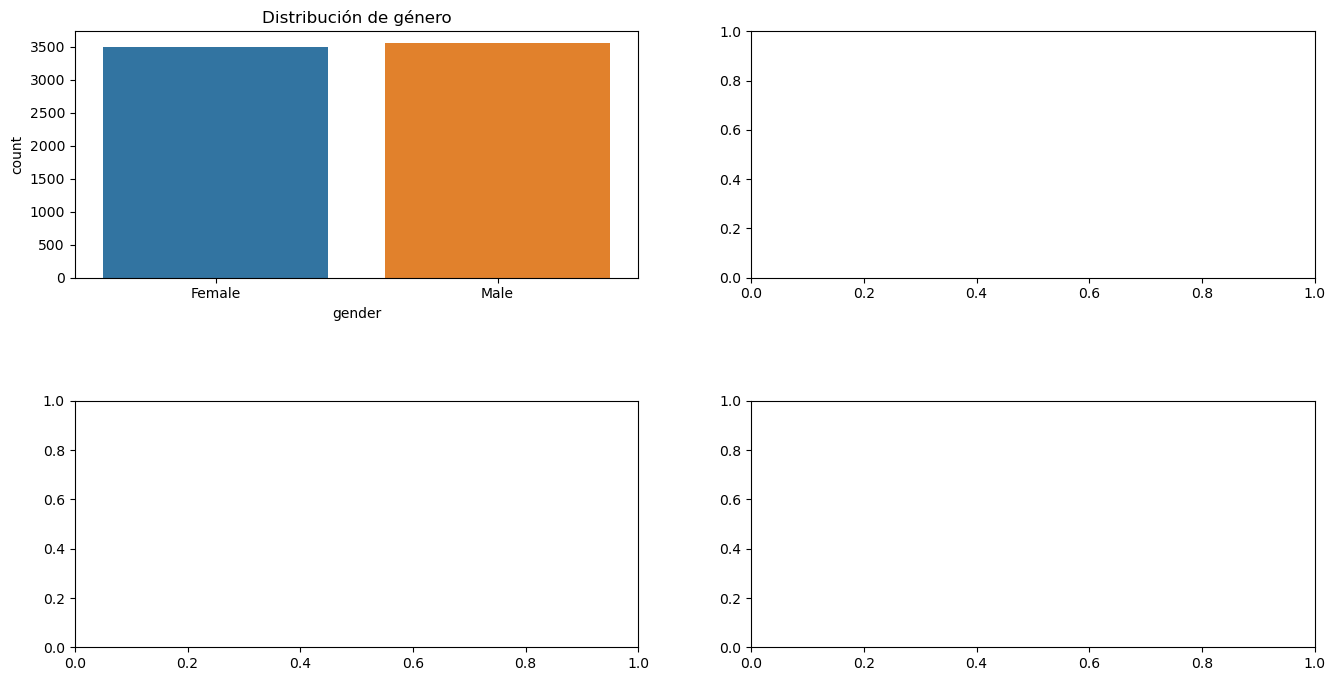

In [22]:
#  Verificamos como se distribuyen los principales atributos
# Por atributo principal verificamos: 
#1- En el caso de Sexo, Existen una paridad de Clientes de ambos sexos.
#2- Existe un 16% de Clientes Pasivos del Total de Clientes.
#3- Los que tienen pareja el 48% del total.
#4 - El 70% de Clientes no tienen grupo familiar.

# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Gráfico de barras para "gender"
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género")

# Gráfico de barras para "SeniorCitizen"
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Gráfico de barras para "Partner"
sns.countplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas")

# Gráfico de barras para "Dependents"
sns.countplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()


In [ ]:
# RELACIONO ESTOS ATRIBUTOS CON LA VARIABLE TARGET CHURN (RENUNCIA)
# **INSIGHTS**: 
#1- En el caso de Sexo, no se ve un comportamiento determinante por sexo ( Cantidad de renunicias son similares).
#2- Cuando realiza,por Activos se verifica mayor renuncia que los pasivos
#3- Los que NO tienen pareja son los que en este mes mas renuncian 
#4 - Los que no tienen grupo familiar  son los que mayor renuncian

# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Crear gráficos de barras apilados para "gender" en función de "Churn"
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género por Renuncia")

# Crear gráficos de barras apilados para "SeniorCitizen" en función de "Churn"
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores por Renuncia")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Crear gráficos de barras apilados para "Partner" en función de "Churn"
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas por Renuncia")

# Crear gráficos de barras apilados para "Dependents" en función de "Churn"
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes por Renuncia")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()

In [ ]:
# Creamos un Histograma utilizando Seaborn para verificar la distribución de la variable TERNURE (ANTIGUEDAD).
ax = sns.histplot(df['tenure'], bins=int(180/5), color='darkblue',
                  edgecolor='black', kde=False, linewidth=4)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (Meses)')
ax.set_title('# de clientes por  Ternure(Atniguedad) (en meses)')

# Show the plot
plt.show()
#1. Tenure: Después de observar el Histograma que sigue, podemos observar
# una buena cantidad de clientes que permanecen con solo un mes en la empresa
# mientras tambien hay  muchos de los clientes que tienen 72 meses. 
# INSIGHT : esto puede ser potencialemnte porque tienen distintos tipos de servicios  prestados
# que , basasdos en el que cada uno tiene,puede ser mas facil o mas dificil irse de la empresa.


In [ ]:
# Veo la relación entre antiguedad y precio total y Existe una clara correlación entre los mismos


# Supongamos que tienes un DataFrame llamado df con columnas "antigüedad(tenure)" y "precio_total(Total Charges)"
sns.scatterplot(x='tenure', y='TotalCharges', data=df)

# Puedes personalizar el gráfico agregando etiquetas y un título
plt.xlabel('Antigüedad')
plt.ylabel('Precio Total')
plt.title('Relación entre Antigüedad y Precio Total')

# Muestra el gráfico
plt.show()

In [ ]:
#Analizo la relación de tipo de contrato con la Renuncia(Churn). 


# Crear un gráfico de barras apiladas para el tipo de contrato en función de Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Tipo de Contrato por Churn')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()

Se ve claramente que los contratos mensuales son los que generan mayor cantidad de renuncias.

In [ ]:
# Verificamos las cantidades por tipo de contrato actual.
df.Contract.value_counts()

La mayor cantidad de Clientes con pagos electrinicos  son los que renucian
El Pago por Transferencia, por cheques y débito automático son los que los que menos renuncian 


In [ ]:
# Crear un nuevo DataFrame para contar la cantidad de servicios
services_df = df[['PhoneService', 'InternetService']].copy()

# Contar la cantidad de cada combinación de servicios
service_counts = services_df.groupby(['PhoneService', 'InternetService']).size().reset_index(name='Count')

# Calcular el porcentaje relativo
service_counts['Relative Percentage'] = (
    service_counts['Count'] / service_counts['Count'].sum() * 100
)

# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras utilizando seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='PhoneService', y='Count', hue='InternetService', data=service_counts, palette='viridis'
)

# Añadir etiquetas con los números y porcentajes encima de las barras
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.0f} ({height / service_counts["Count"].sum() * 100:.1f}%)',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.title('Número de clientes con Teléfono y Servicio de Internet')

# Mostrar el gráfico
plt.show()




INSIGHTS: 
- DEL TOTAL DE CLIENTES SOLO EL 9,7% NO TIENE SERVICIOS DE TELEFONIA (682 CLIENTES) Y  EL 21,7% NO TIENEN
INTERNET (1526)
- EL SERVICIO DE INTERNET  MAS UTILIZADO ES DSL UTILIZADO POR EL 44% (3096 CLIENTES), SEGUIDO DSL CON EL 24,7% (1739 CLIENTES)  

In [ ]:
df

In [ ]:
#Creo columna para ver quienes tienen internet + telefono.
df["pack"]= df["PhoneService"] + df["InternetService"]


In [ ]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df["Cant_Internet"]= df["InternetService"]+ df["OnlineSecurity"] + df["OnlineBackup"]+ df["DeviceProtection"]+ df["TechSupport"]+ df["StreamingTV"]+df["StreamingMovies"]

In [ ]:
df.head()

In [ ]:

# Histograma de cantidad de clientes que tome 1 o mas servicios de internet por Servicios de internet
sns.histplot(data=df, x='Cant_Internet', bins=10, kde=True)  # Puedes ajustar el número de bins según tus preferencias

# Personalizar el gráfico con etiquetas y título
plt.xlabel('Cantidad de Servicios de Internet por Cliente')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Servicios de Internet por Cliente')

# Mostrar el histograma
plt.show()

In [ ]:

service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
service_data = df[service_columns]

# Transforma las variables categóricas a variables dummy
service_data = pd.get_dummies(service_data, columns=['PhoneService', 'MultipleLines', 'InternetService', 
                                                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                                     'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)

# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas para la distribución de servicios por churn
plt.figure(figsize=(12, 8))
service_data.groupby('Churn').sum().transpose().plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribución de Servicios por Churn')
plt.xlabel('Servicio')
plt.ylabel('Cantidad')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


In [ ]:
 #Analizo relación entre Tenure(Antiguedad como cliente) y Churn(Renuncia). 
# Boxplot de la relación entre Tenure y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Relación entre Antigüedad como cliente y Renuncia')
plt.xlabel('Renuncia (Churn)')
plt.ylabel('Antigüedad como cliente (Tenure)')
plt.show()


 Analizo relación entre Tenure y Churn. Claramente observamos que los que se han ido tenían menos tiempo. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas numéricas para la matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Configura el tamaño de la figura
plt.figure(figsize=(15, 12))

# Crea el mapa de calor con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade el título
plt.title("Matriz de Correlación")

# Muestra el gráfico
plt.show()





# FEATURES SELECTION 

In [ ]:
url = 'https://raw.githubusercontent.com/yoriohe/ProyectoCoderHouse/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

dff=  pd.read_csv(url,sep=",")
dff.head()

In [ ]:
dff["gender"].replace({"Female" : 0,  "Male": 1}, inplace=True)
dff["SeniorCitizen"].replace({"Yes" : 1,  "No": 0}, inplace=True)
dff["Partner"].replace({"Yes" : 1,  "No": 0}, inplace=True)
dff["Dependents"].replace({"Yes" : 1,  "No": 0}, inplace=True)
dff["PhoneService"].replace({"Yes" : 1,  "No": 0}, inplace=True)
dff["MultipleLines"].replace({"Yes" : 1,  "No": 0, "No phone service": 0}, inplace=True)
dff["InternetService"].replace({"Fiber optic": 1, "DSL": 1, "DLS": 1, "Fiber_optic":1, "No": 0, "_": 0}, inplace=True)
dff["OnlineSecurity"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["OnlineBackup"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["DeviceProtection"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["TechSupport"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["StreamingTV"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["StreamingMovies"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
dff["Contract"].replace({"Month-to-month": 1, "One year": 0, "Two year": 0}, inplace=True)
dff["PaperlessBilling"].replace({"Yes" : 1,  "No": 0}, inplace=True)
dff["PaymentMethod"].replace({"Electronic check": 1, "Mailed check": 0, "Credit card (automatic)": 0, "Bank transfer (automatic)": 0}, inplace=True)
dff["Churn"].replace({"Yes" : 1,  "No": 0}, inplace=True)

In [ ]:
# Discretizar la variable 'tenure' en intervalos
#dff['tenure_group'] = pd.cut(dff['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])


In [ ]:
# A ver, qué construí? 
#dff.groupby('tenure_group').agg(      
#    MINIMO = ('Churn', 'min'),
#    MAXIMO = ('Churn', 'max'),
#    Cantidad = ('Churn','count')
#).reset_index()

In [ ]:
# Supongamos que tenure_group es de tipo 'category'
# Si no lo es, primero conviértelo a categoría usando: df['tenure_group'] = df['tenure_group'].astype('category')

# Asigna valores numéricos a las categorías
'''
tenure_group_mapping = {
    '0-12 months': 1,
    '13-24 months': 2,
    '25-36 months': 3,
    '37-48 months': 4,
    '49-60 months': 5,
    '61+ months': 6
}

dff['tenure_group'] = dff['tenure_group'].map(tenure_group_mapping)
'''


In [ ]:
#Creo columna para ver quienes tienen internet + telefono.
dff["pack"]= dff["PhoneService"] + dff["InternetService"]

In [ ]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

dff["Cant_Internet"]= dff["InternetService"]+ dff["OnlineSecurity"] + dff["OnlineBackup"]+ dff["DeviceProtection"]+ dff["TechSupport"]+ dff["StreamingTV"]+dff["StreamingMovies"]

In [ ]:
dff.head()

In [ ]:
dff.dtypes

In [ ]:
import pandas as pd

# Elimina las columnas no numéricas antes de calcular la correlación
df_numeric = dff.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
matriz_correlacion = df_numeric.corr(method='pearson')

# Selecciona la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Churn'].abs()

# Excluye columnas específicas del análisis de correlación
columnas_a_excluir = ['Churn']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)

# Ordena de mayor a menor correlación 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

# Muestra la matriz de correlación
print(matriz_correlacion_target)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea un gráfico de barras horizontales
sns.barplot(x=matriz_correlacion_target, y=matriz_correlacion_target.index, palette="viridis")

# Añade etiquetas y título
plt.xlabel('Correlación Absoluta')
plt.ylabel('Variables')
plt.title('Correlación de Variables con Churn')

# Muestra el gráfico
plt.show()


# Wrapper Feature Selection

1) Forward selection

In [ ]:
valores_nulos  = dff.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos == 0]
columnas_con_nulos

In [ ]:
# Defino función para hacer la selección de varaibles
import statsmodels.api as sm
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
# Matriz de Features
X = dff[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'pack', 'Cant_Internet']]

# Target
y = dff['Churn']

In [ ]:
X.dtypes

In [ ]:
y

In [ ]:
X['SeniorCitizen'] = pd.to_numeric(X['SeniorCitizen'], errors='coerce')


In [ ]:
X.dtypes

In [ ]:
X['SeniorCitizen'] = pd.to_numeric(X['SeniorCitizen'], errors='coerce')
print(X.isnull().sum())


In [ ]:
X['SeniorCitizen' ]

In [ ]:
VARIABLES_ELEGIDAS = forward_selection(data = X,
                                       target = y,
                                       significance_level = 0.01)
print("Quedaron seleccionadas:")
VARIABLES_ELEGIDAS

We will give k = 5 to show case scores of all features.If we want top 3 features we can directly give k = 3

 Using Pearsons coorelation matrix

Actualmente tenemos 20 featuress. Repasemos las 17 características principales y  vemos  cómo funciona.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector


model = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
sfs = SequentialFeatureSelector(model,n_features_to_select=17,scoring='roc_auc',direction='forward')
sfs.fit(x_train,y_train)


idxes = sfs.get_support(indices=True)
top_feats = x_train.columns[idxes]
print(f'Las  features seleccionadas son  {top_feats}')


### modelo
best_est = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
best_est = best_est.fit(x_train[top_feats],y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(x_train[top_feats])[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(x_test[top_feats])[:,1])


print(f'Resultados después de reducir de 20 a 17 features')
print('Area  train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area  test roc {}'.format(auc(test_fpr, test_tpr)))

En el conjunto de entrenamiento (train), el AUC es aproximadamente 0.849.
En el conjunto de prueba (test), el AUC es aproximadamente 0.814.
Con un AUC razonablemente alto tanto en el conjunto de entrenamiento como en el conjunto de prueba. La reducción de características puede ser útil para simplificar y acelerar el modelo sin sacrificar significativamente el rendimiento.

I will try to model the customers who will leave the company (aka Churn) based on the above dataset. I will build the following models:
* logistic regression
* svm
* knn
* NaiveBayes
* random forest
* xgboost

Preparation before model training

In [ ]:
df['TotalCharges'].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
train_columns = df.columns.to_list()

for elem in ["customerID","Churn"]:
    train_columns.remove(elem)

In [ ]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [ ]:
# converting the categorical features
df_dummies = pd.get_dummies(df[categorical_variables])

In [ ]:
# adding the numerical features
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})


y = df_dummies['Churn']
X = df[train_columns]


from sklearn.preprocessing import LabelEncoder

for col in train_columns:
    
    le = LabelEncoder()
    le.fit(X[col].to_list())
    X[col] = le.transform(X[col])


clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score", "elapsed_time"])
roc_auc_score_list = []

In [ ]:
pip install scikit-plot


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

Baseline Logistic Regression

In [ ]:

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.linear_model import LogisticRegression

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))

roc_auc_list = []
num_of_folds = 10
num_fold = 0
#feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_logit = LogisticRegression(random_state=42, max_iter=500)

    clf_stra_logit.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_logit.predict(xvalid)
    predictions_probas = clf_stra_logit.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds
    
    roc_auc_list.append(roc_auc_score(yvalid, predictions_probas[:,1], average = "macro"))

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds
    
predictions = np.argmax(predictions_probas_list, axis=1)
roc_auc_score_list.append(roc_auc_list)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

#sns.set(rc={'figure.figsize':(12, 38)})
#clf_stra_logit.plot_importance(clf_stra_logit, title='Feature importance', xlabel='F score', ylabel='Features')

elapsed_time = time.time() - start_time
clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_logit",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"),
                     "elapsed_time": elapsed_time}, ignore_index=True)

print()
print("elapsed time in seconds: ", elapsed_time)
print()
import gc
gc.collect();

Conclusiones:

El modelo tiene un buen desempeño en la clasificación general, con un alto valor de accuracy.
La precisión y el recall varían entre las clases, con una mayor precisión para la clase 0 y un recall más bajo para la clase 1.
El f1-score ponderado proporciona una medida general del rendimiento del modelo.
Las métricas de validación cruzada refuerzan la evaluación del modelo en diferentes particiones del conjunto de datos, mostrando una consistencia en su rendimiento.


In [ ]:
import pandas as pd

# Elimina las columnas no numéricas antes de calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
matriz_correlacion = df_numeric.corr(method='pearson')

# Selecciona la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Churn'].abs()

# Excluye columnas específicas del análisis de correlación
columnas_a_excluir = ['Churn']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)

# Ordena de mayor a menor correlación 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

# Muestra la matriz de correlación
print(matriz_correlacion_target)
